In [99]:
# Tunnel Traffic is a time series describing the number of vehicles traveling through 
# the Baregg Tunnel in Switzerland each day from November 2003 to November 2005. In this example, 
# we'll get some practice applying linear regression to time-step features and lag features.

In [100]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [101]:
simplefilter("ignore")  # ignore warnings to clean up output cells

In [102]:
# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [103]:
# Load Tunnel Traffic dataset
data_dir = Path("../Datasets/TS_Course_Data/tunnel.csv")
# tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])
tunnel = pd.read_csv(data_dir, parse_dates=["Day"])
tunnel.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [104]:
# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
tunnel = tunnel.set_index("Day")
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [105]:
# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [106]:
# Time Step Feature
df = tunnel.copy()

df['Time'] = np.arange(len(tunnel.index))

df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [107]:
# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'NumVehicles']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

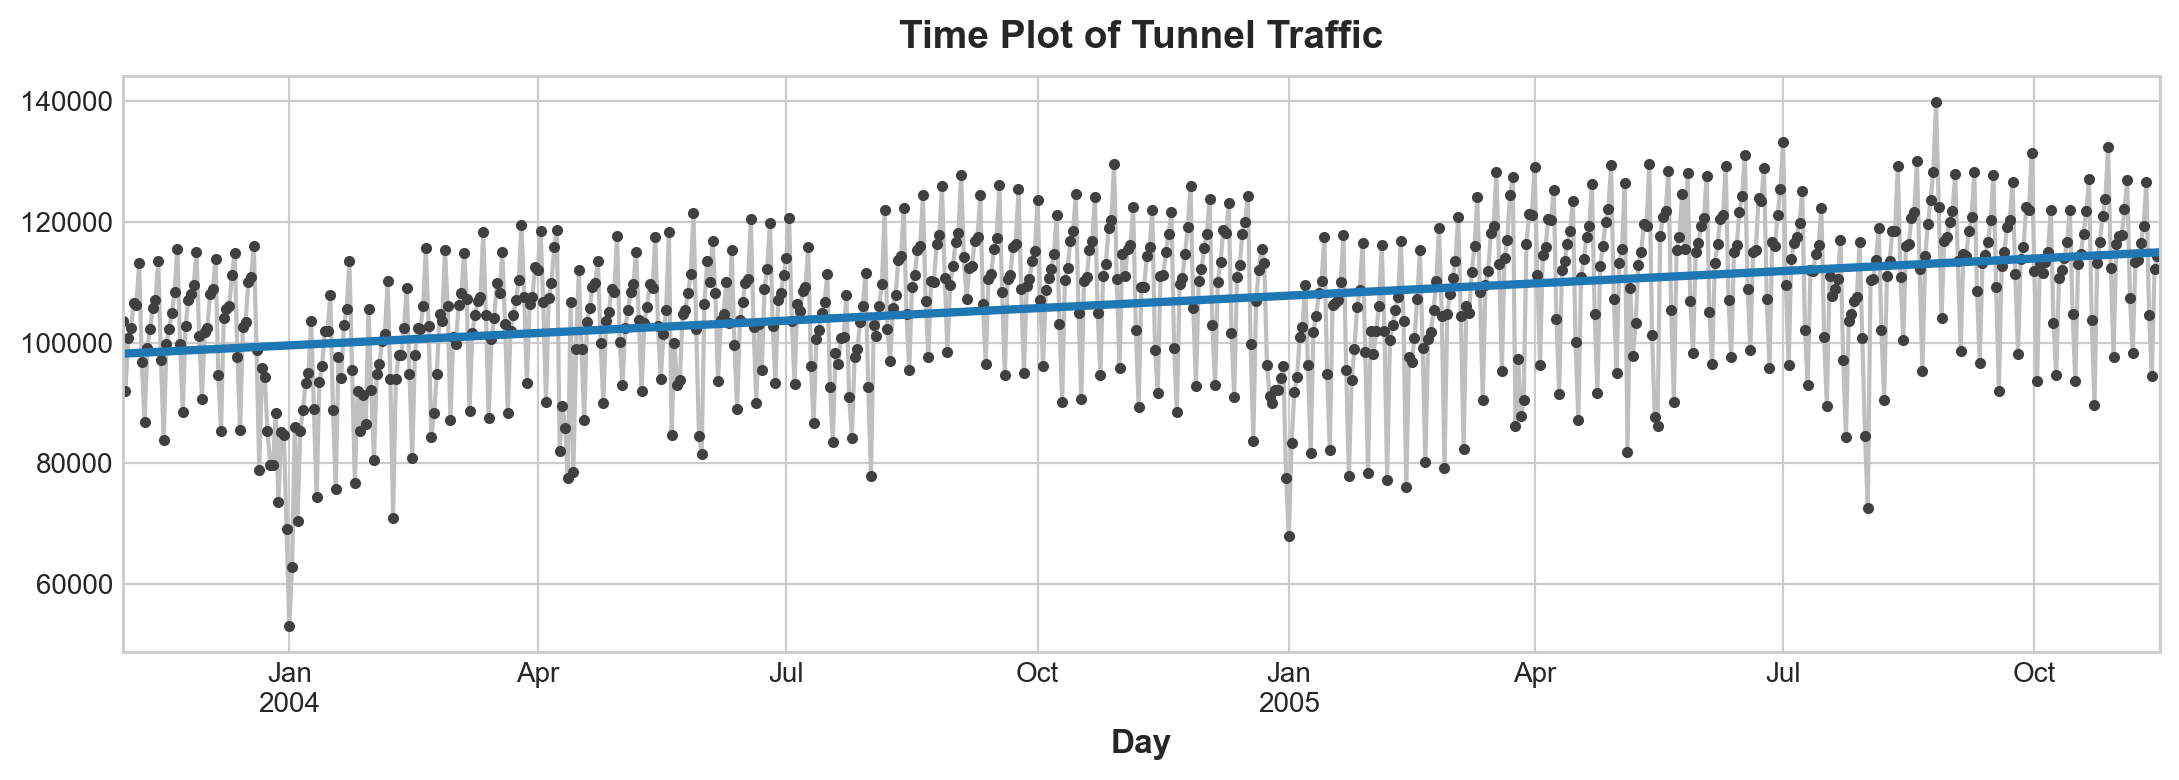

In [108]:
ax = y.plot(**plot_params)
# Plots the number of vehicles (previous cell)
# plot_params defined in cell near the top
# The ** syntax is used to unpack the dictionary and 
# pass its contents as keyword arguments to the function.
ax = y_pred.plot(ax=ax, linewidth=3)
# Plots the predictions (line)
ax.set_title('Time Plot of Tunnel Traffic');

In [109]:
# Lag feature
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [110]:
df.isna().sum()
# df.isnull().sum()

NumVehicles    0
Time           0
Lag_1          1
dtype: int64

In [111]:
X = df.loc[:, ['Lag_1']]
# The . loc property of the DataFrame object 
# allows the return of specified rows and/or columns from that DataFrame
# : selects all rows, and ['Lag_1'] specifies the column(s) to select.
X.dropna(inplace=True)  # drop missing values in the feature set
# inplace = True , the data is modified in place, 
# which means it will return nothing and the dataframe is now updated.
y = df.loc[:, 'NumVehicles']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

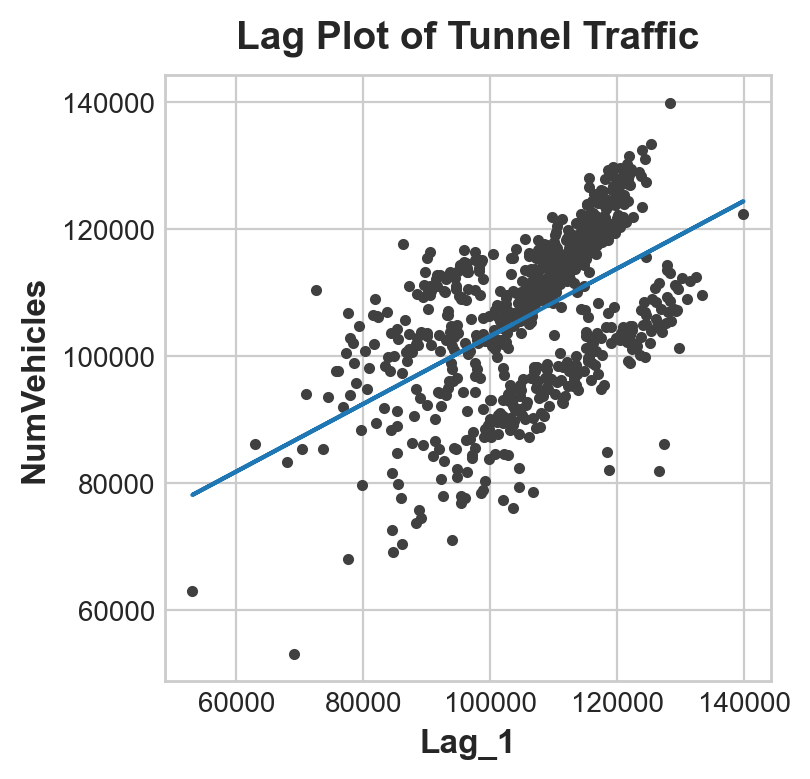

In [112]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

In [113]:
# What does this prediction from a lag feature mean about how well 
# we can predict the series across time? The following time plot shows us how our 
# forecasts now respond to the behavior of the series in the recent past.

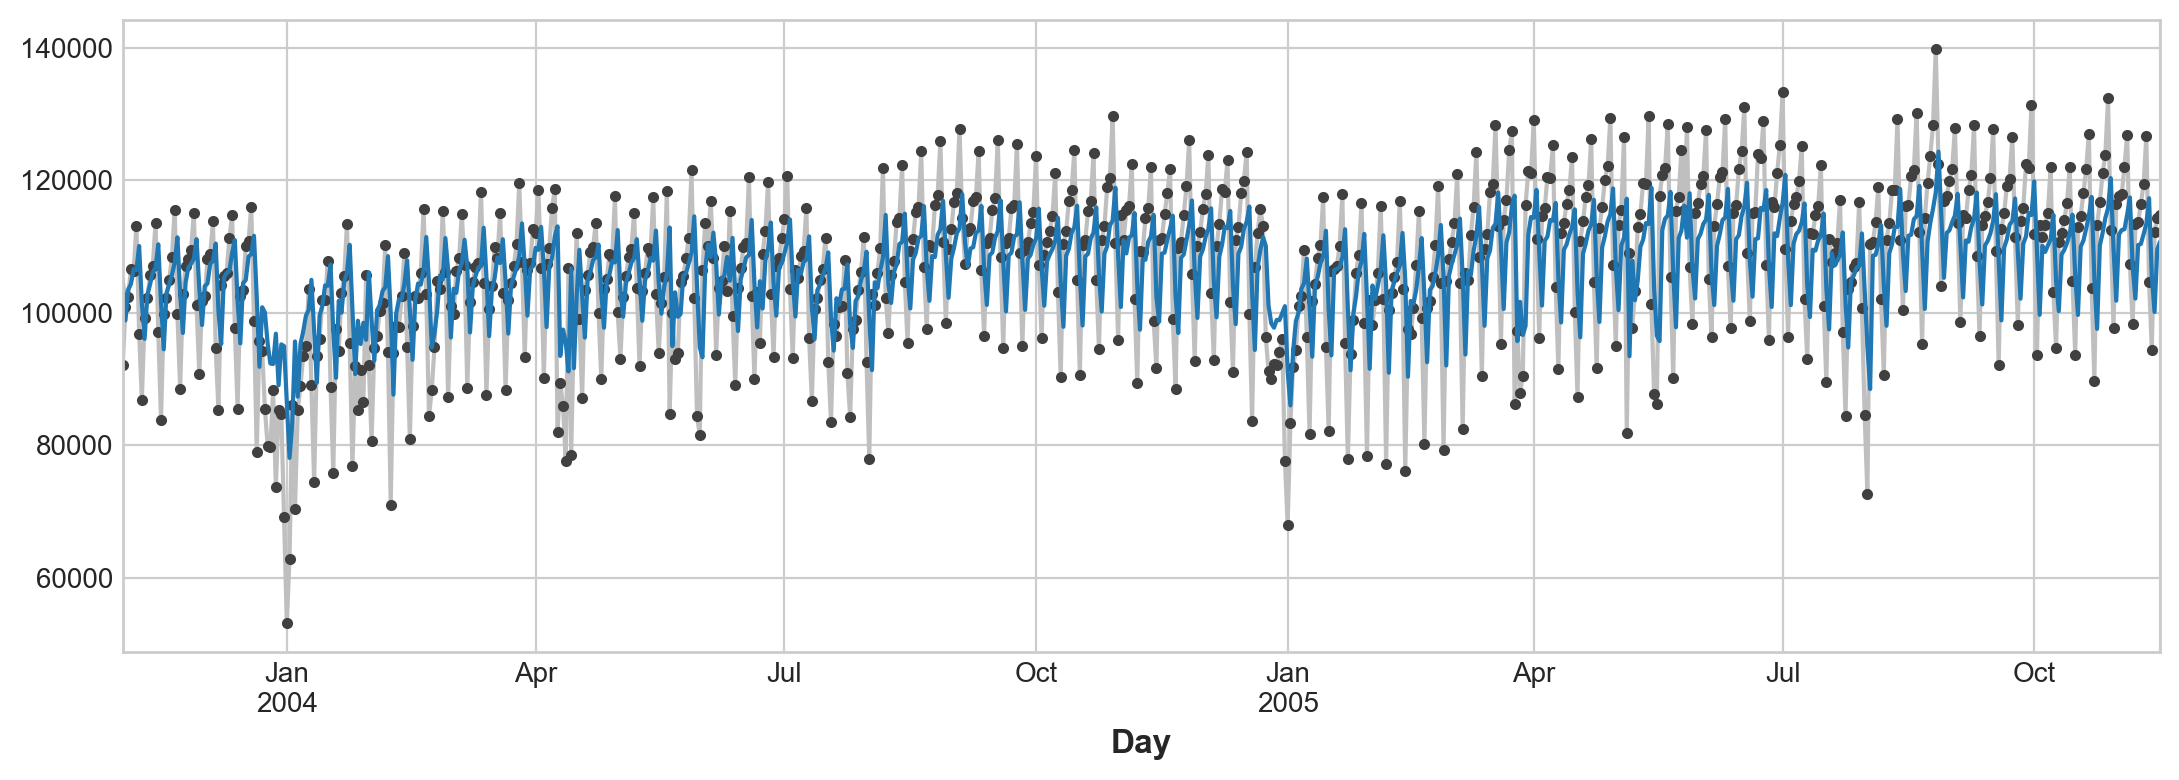

In [114]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [117]:
MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = mean_squared_error(y, y_pred, squared=False)
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100


In [118]:
print(MAE,MSE,RMSE)
print(MAPE)
# Need to determine the meaning of the values

8812.627118676011 111099657.1572799 10540.382211157235
8.706072321632888


In [ ]:
# According to wikipedia
# The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), 
# is a measure of prediction accuracy of a forecasting method in statistics. 
# It usually expresses the accuracy as a ratio defined by the formula:

In [ ]:
# ChatGPT:
# A Mean Absolute Percentage Error (MAPE) of 8% indicates that, on average, 
# the model's predictions deviate from the actual values by 8%. 
# In other words, the model's forecasts are, on average, 8% off from the actual observed values.